## Problem Landscape Analysis

Visualize the different functions to understand their characteristics.

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
class BlackBox:
    """
    This class implements a simple interface to the black-box service for the ODM course.
    """

    def __init__(self, token: int, endpoint: str = 'http://ls-stat-ml.uni-muenster.de:7300/'):
        self.endpoint = endpoint
        self.token = token

    def set_endpoint(self, endpoint: str):
        self.endpoint = endpoint

    def evaluate(self, objective: str, parameters: list) -> float:
        r = requests.post(url=self.endpoint + "compute/" + objective,
                          json={"parameters": [str(v) for v in parameters], "token": self.token})
        return float(r.json())

    def evaluate_gradient(self, objective: str, parameters: list) -> list:
        r = requests.post(url=self.endpoint + "compute_gradient/" + objective,
                          json={"parameters": [str(v) for v in parameters], "token": self.token})
        return r.json()

In [3]:
group_number = 11
bb = BlackBox(token = group_number)

In [4]:
def create_grid(x_range, y_range, resolution):
    """Create a grid for visualization."""
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    return X, Y

def evaluate_on_grid(bb, objective, X, Y):
    """Evaluate the objective function on a grid."""
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = bb.evaluate(objective, [X[i, j], Y[i, j]])
    return Z

Evaluating Function1 for comparison...
Evaluating Function2 for comparison...
Evaluating Function3 for comparison...
Evaluating Function4 for comparison...
Evaluating Function5 for comparison...


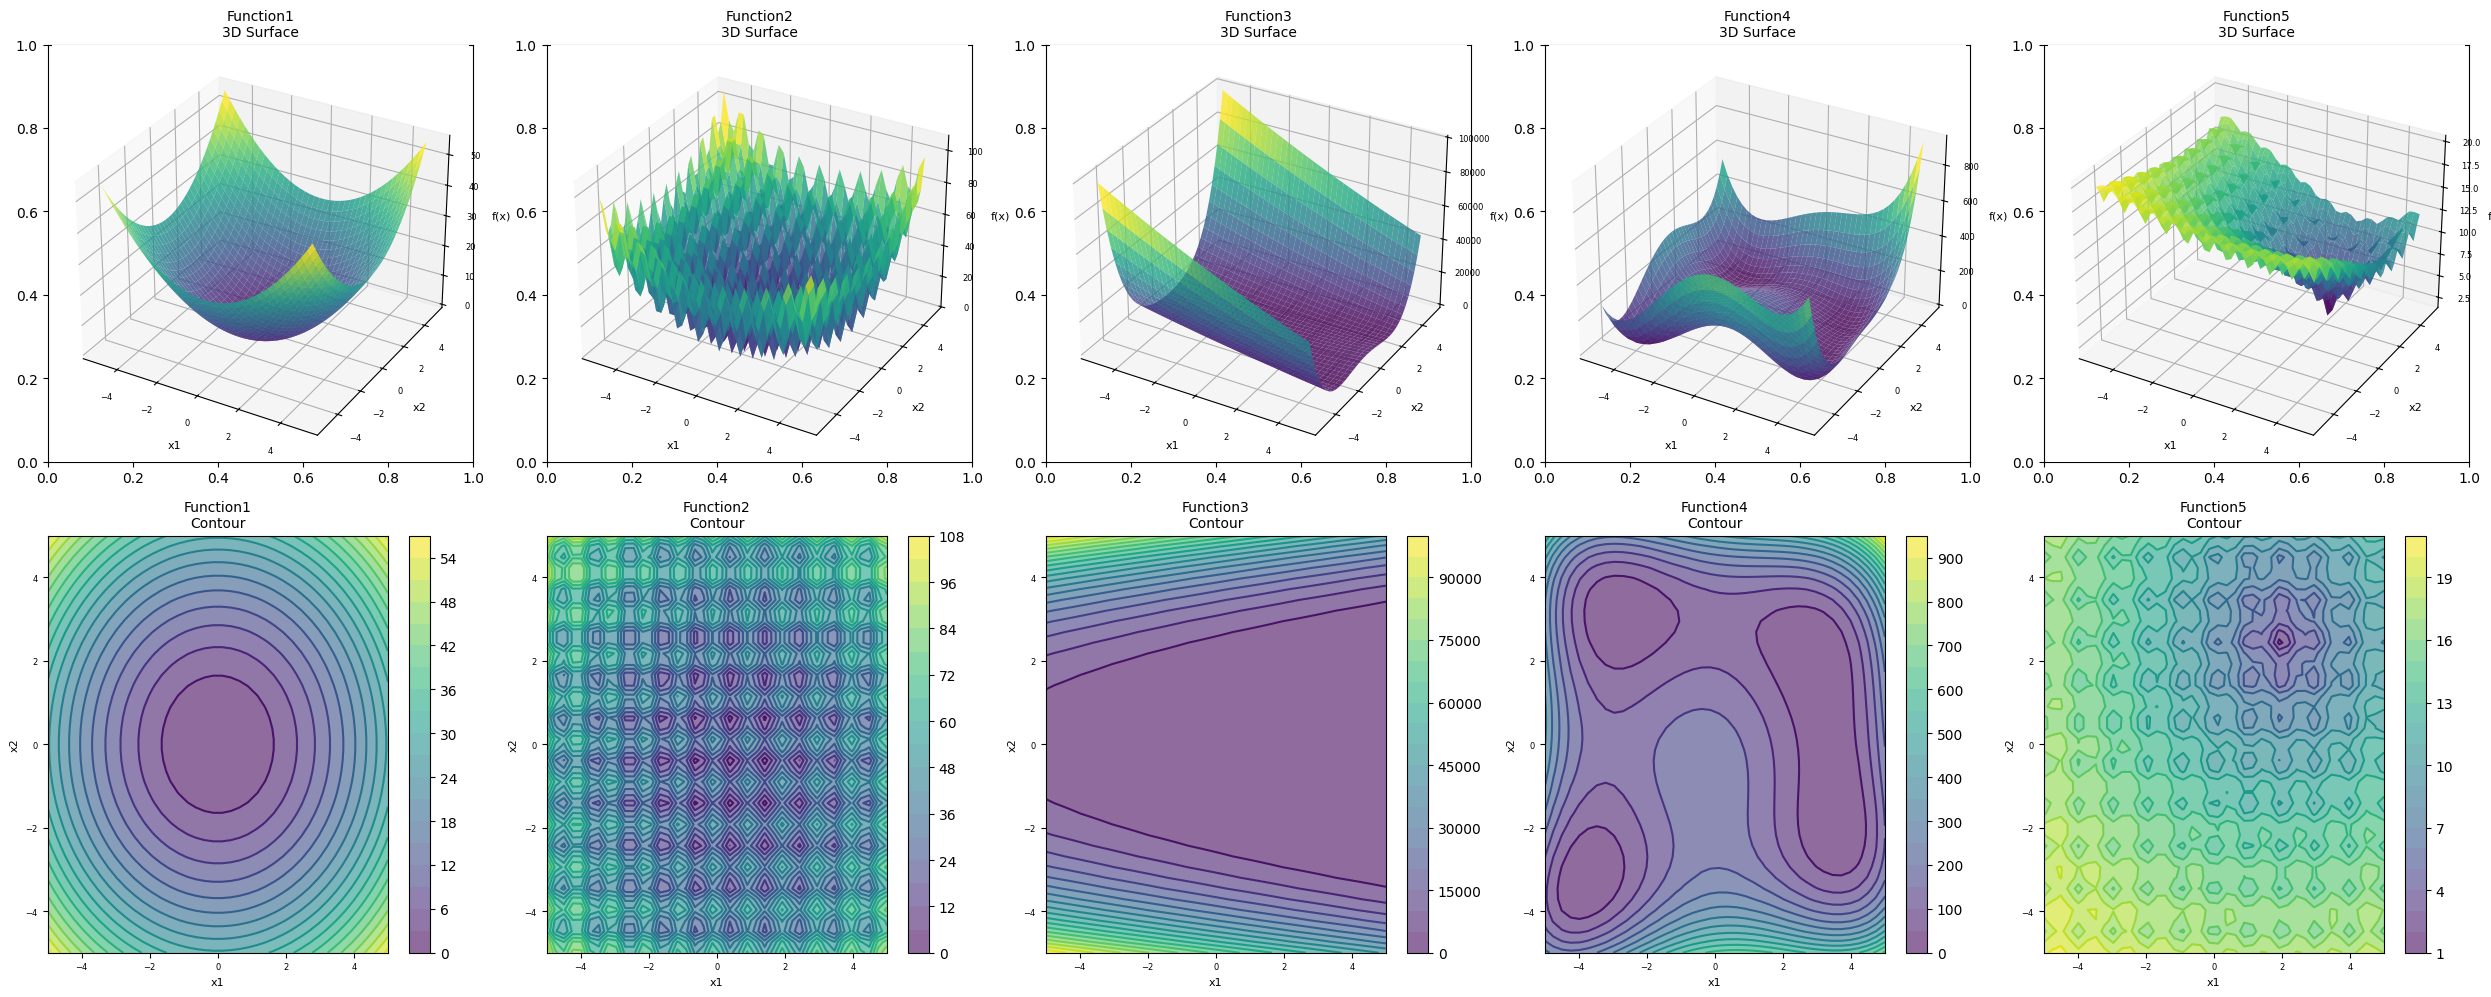

In [5]:
functions = ["Function1", "Function2", "Function3", "Function4", "Function5"]
x_range = (-5, 5)
y_range = (-5, 5)
resolution = 40


n_funcs = len(functions)
fig, axes = plt.subplots(2, n_funcs, figsize=(5*n_funcs, 10))

if n_funcs == 1:
    axes = axes.reshape(-1, 1)

X, Y = create_grid(x_range, y_range, resolution)

for idx, func in enumerate(functions):
    print(f"Evaluating {func} for comparison...")
    Z = evaluate_on_grid(bb, func, X, Y)
    
    # 3D surface
    ax1 = fig.add_subplot(2, n_funcs, idx+1, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8, antialiased=True)
    ax1.set_xlabel('x1', fontsize=8)
    ax1.set_ylabel('x2', fontsize=8)
    ax1.set_zlabel('f(x)', fontsize=8)
    ax1.set_title(f'{func}\n3D Surface', fontsize=10)
    ax1.tick_params(labelsize=6)
    
    # Contour plot
    ax2 = axes[1, idx]
    contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
    contourf = ax2.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
    ax2.set_xlabel('x1', fontsize=8)
    ax2.set_ylabel('x2', fontsize=8)
    ax2.set_title(f'{func}\nContour', fontsize=10)
    ax2.tick_params(labelsize=6)
    plt.colorbar(contourf, ax=ax2)

plt.tight_layout()
plt.savefig('function_comparisons.png')
plt.show()